<a href="https://colab.research.google.com/github/Khasnuwr/Brain-Tumor-Segmentation/blob/main/Brain_Tumor_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cloning From GitHub Repository**

In [1]:
!git clone https://github.com/Khasnuwr/Brain-Tumor-Segmentation/

Cloning into 'Brain-Tumor-Segmentation'...
remote: Enumerating objects: 5894, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 5894 (delta 9), reused 16 (delta 7), pack-reused 5873
Receiving objects: 100% (5894/5894), 369.97 MiB | 33.05 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (6271/6271), done.


#**Listing The Dataset files**

In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/Brain-Tumor-Segmentation/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(238).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image (52).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(175).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/4.jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(327).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(96).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(241).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(57).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(155).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(313).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(320).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(215).jpg
/content/Brain-Tumor-Segmentation/dataset/Training/no_tumor/image(232).jpg
/content/Brain-Tumor-Segmentation/da

#**Importing Keras and other Libraries and packages**

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [50]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# **Label, Split and Train the Model**

In [51]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Brain-Tumor-Segmentation/dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Brain-Tumor-Segmentation/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [52]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [54]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [55]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [58]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 13s 105ms/step - loss: 2.1014 - accuracy: 0.3685 - val_loss: 1.2843 - val_accuracy: 0.4728
Epoch 2/20
83/83 [==============================] - 9s 103ms/step - loss: 1.0984 - accuracy: 0.5248 - val_loss: 1.0715 - val_accuracy: 0.5510
Epoch 3/20
83/83 [==============================] - 8s 100ms/step - loss: 0.9860 - accuracy: 0.5796 - val_loss: 0.9393 - val_accuracy: 0.6293
Epoch 4/20
83/83 [==============================] - 8s 99ms/step - loss: 0.8386 - accuracy: 0.6421 - val_loss: 0.8075 - val_accuracy: 0.6565
Epoch 5/20
83/83 [==============================] - 8s 100ms/step - loss: 0.7563 - accuracy: 0.6773 - val_loss: 0.7847 - val_accuracy: 0.6837
Epoch 6/20
83/83 [==============================] - 8s 99ms/step - loss: 0.6763 - accuracy: 0.7132 - val_loss: 0.7848 - val_accuracy: 0.6531
Epoch 7/20
83/83 [==============================] - 8s 98ms/step - loss: 0.5818 - accuracy: 0.7590 - val_loss: 0.5171 - val_accuracy: 0.7925
Epoch 8/

#**Confusion Matrix**

In [86]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict probabilities for each class for the test set
y_pred_probabilities = model.predict(X_test)

# Extract the class with the highest probability as the predicted class
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded labels back to categorical labels for the test set
y_test_categorical = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_categorical, y_pred)

11/11 [==============================] - 0s 25ms/step


In [87]:
conf_matrix

array([[86,  4,  2,  1],
       [ 5, 82,  1,  7],
       [ 4,  5, 36,  7],
       [ 0,  3,  0, 84]])

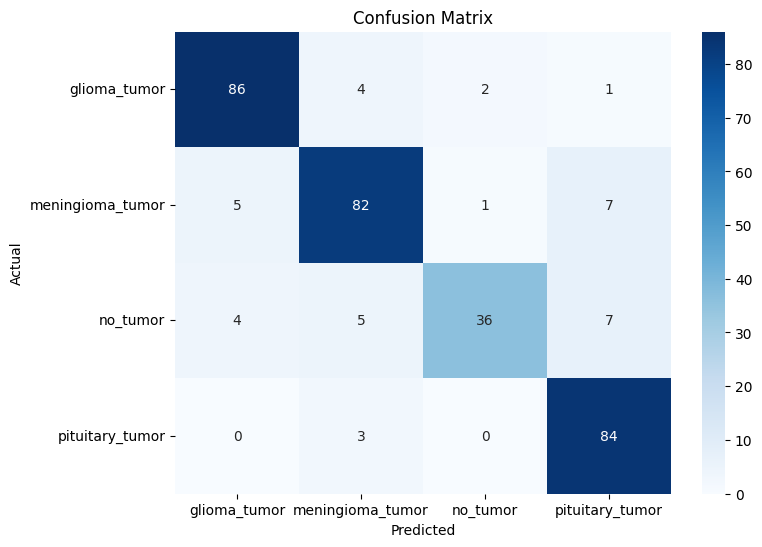

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define labels for better visualization
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Accuracy Graps**

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

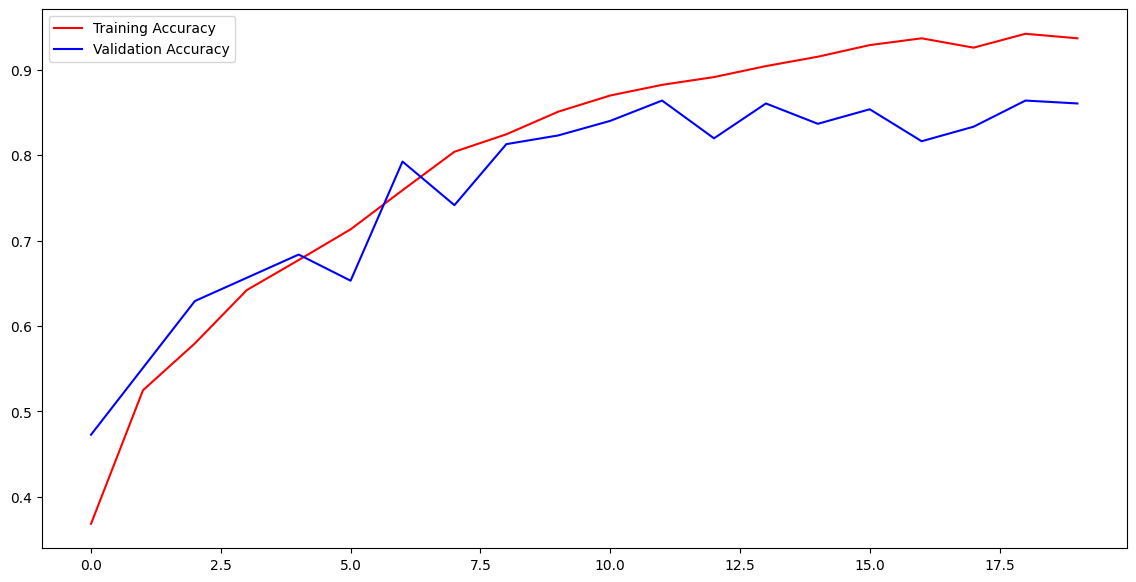

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

# **Loss Matrics**

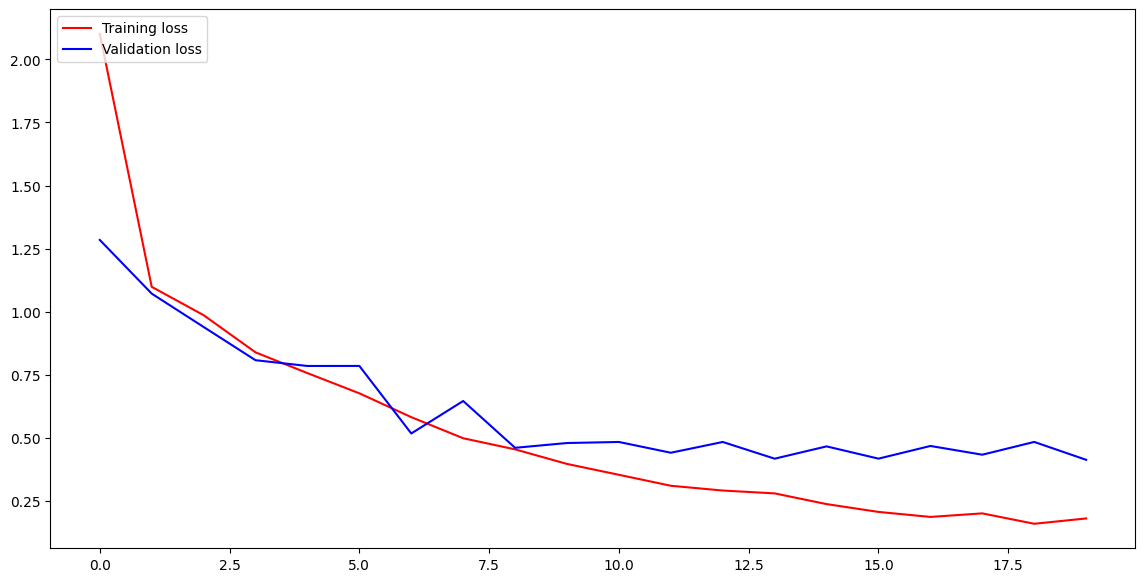

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

# **Saving The Model**

In [ ]:
model.save('/content/Brain-Tumor-Segmentation/Models/braintumor.h5')

# **Reading and extracting the Image into image array and predict from the Trained Model**

In [64]:
img = cv2.imread('/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(112).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [65]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

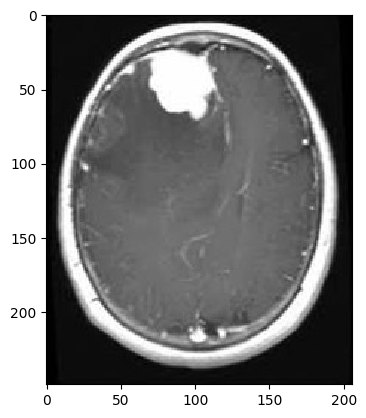

In [66]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(112).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [67]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 121ms/step


1

In [68]:
if indices == 0:
  print("Predicted Class is Glioma Tumor")

if indices == 1:
  print("Predicted Class is Meningioma Tumor")

if indices == 2:
  print("Predicted Class is No Tumor")

if indices == 3:
  print("Predicted Class is Pituitary Tumor")

Predicted Class is Meningioma Tumor


#**Predict from saved model**

In [69]:
from tensorflow.keras.models import load_model

In [70]:
saved_model = load_model('/content/Brain-Tumor-Segmentation/Models/braintumor.h5')

In [71]:
saved_model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 118ms/step


1

In [72]:
if indices == 0:
  print("Predicted Class is Glioma Tumor")

if indices == 1:
  print("Predicted Class is Meningioma Tumor")

if indices == 2:
  print("Predicted Class is No Tumor")

if indices == 3:
  print("Predicted Class is Pituitary Tumor")

Predicted Class is Meningioma Tumor
